#                        BRAINWAVE MATRIX SOLUTIONS

In [59]:
from PIL import Image
img = Image.open('origin.jpg')
img.show()

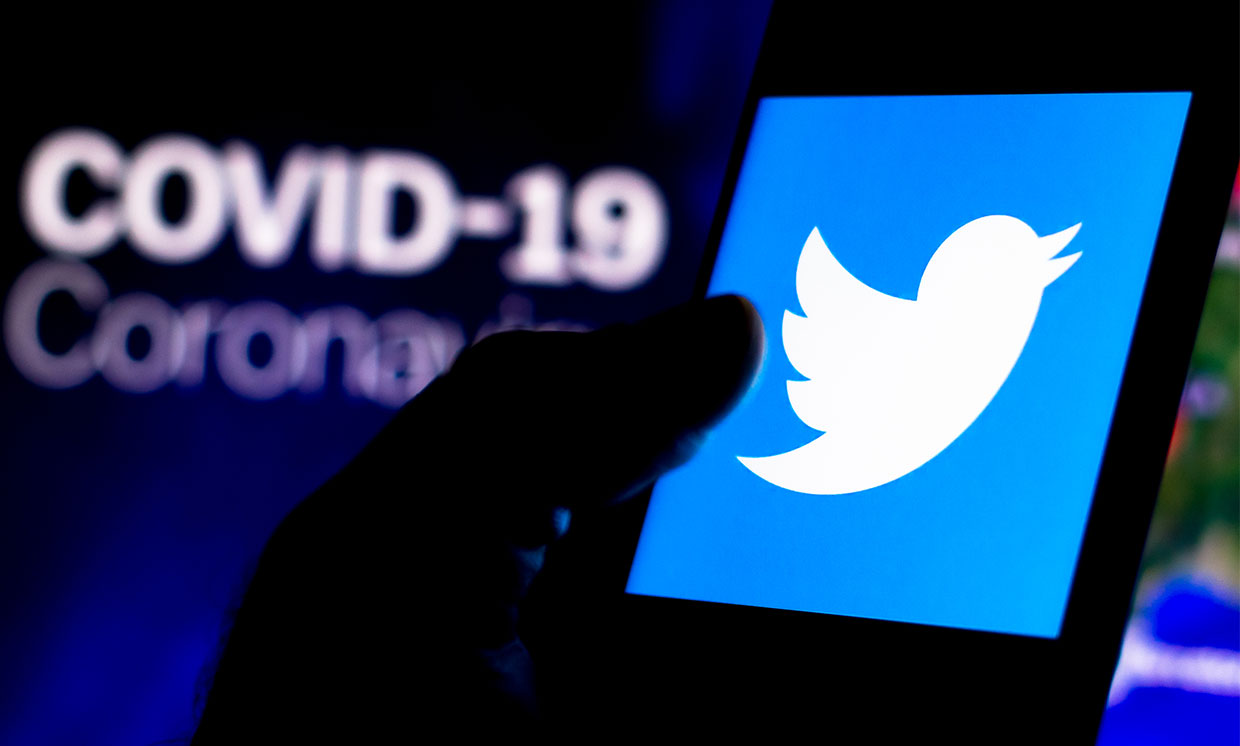

In [60]:
img

## Problem Statement
### Social Media Sentiment Analysis
           Analyze social media data (e.g., Twitter) to understand public sentiment
          towards specific topics, products, or events. Use natural language
          processing (NLP) techniques to preprocess text data, extract sentiment
         scores, and visualize sentiment trends over time.

#                                Aim of the Project

In this project, we aim to develop a social media Sentiment Analysis System to Assist Organizations, Including platforms like Facebook and Twitter. To analyze public sentiment and opinions regarding COVID-19 by extracting and processing tweets from Twitter, using sentiment analysis techniques to categorize the emotions and attitudes expressed. The goal is to track how people’s sentiments have evolved over time in response to key events related to the pandemic, government actions, vaccines, and public health guidelines, providing valuable insights into public perception and emotional responses during the crisis.

# Agenda

* <a href="#Import-library">Import library</a>
* <a href="#Missing-data">Missing data</a>
* <a href="#Data-Cleaning">Data Cleaning</a>
* <a href="#Data-Visualization">Data Visualization</a>
* <a href="#Sentiment-Analysis-using-nltk-VADER">Sentiment Analysis using nltk VADER</a>


# **Import library**

* Importing packages for data analysis
* Importing pacakges for data visuals

In [12]:
#importing packages for data Analysis

import numpy as np # linear algebra
import pandas as pd # data processing

#importing wordcloud for visual

from wordcloud import WordCloud, STOPWORDS

In [13]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [14]:
#importing packages for data visuals

import matplotlib.pyplot as plt
import seaborn as sns


#importing packages for interactive data visuals

from plotly import __version__

import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()


from IPython.display import HTML



import plotly.express as px

In [15]:
# importing natural language packages/library to process text

import nltk

nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sanket\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [17]:
#importing data

df = pd.read_csv('covid19_tweets.csv')

In [18]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


# <a href="#Missing-data">Missing data</a>

In [19]:
# let us start with missing values


Missing_values = df.isnull().sum() / len(df) *100

Missing_values.iplot(kind='bar',title='Missing values in each columns in %',theme='white',color='#3DD8AD')




<AxesSubplot:title={'center':'Missing values in each columns'}>

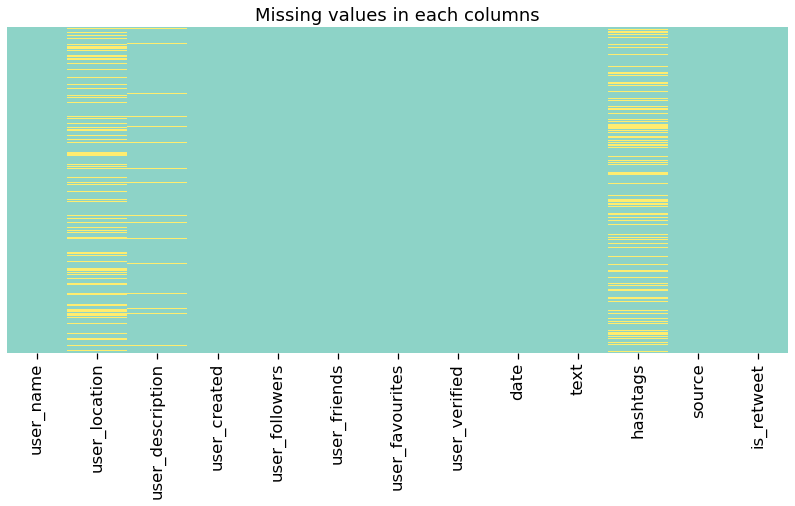

In [20]:
# we can how many rows are empty in each cloumn through visual

plt.figure(figsize=(14,6))
plt.title('Missing values in each columns')
sns.set_context(context='notebook',font_scale=1.5)
sns.heatmap(df.isnull(),cmap='Set3',cbar=False,yticklabels=False)

# <a href="#Data Cleaning">Data Cleaning</a>

Data cleansing or data cleaning is the process of detecting and correcting corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.
*  Ref Wikipedia

In [21]:
df['user_location'].value_counts()[0:5]

#below results seems to be fine but after deep cleaning the location column found that United states has the higer number of tweets

India               3741
United States       2455
New Delhi, India    1721
Mumbai, India       1401
Washington, DC      1354
Name: user_location, dtype: int64

In [22]:
# cleaning user location column

df['user_location'] = df['user_location'].str.replace('Stuck in the Middle','None')


# well we can create a list to each sub location merge with Main location

India_list = ['आर्यावर्त','. भारत','New Delhi, India','Mumbai, India','Chennai, India',
              'Hyderabad, India','Bhubaneshwar, India','Bengaluru, India',
              'New Delhi','Mumbai','Chennai','Bhubaneswar','Jammu And Kashmir'
             'Guwahati, India','Odisha','Pune, India','Bangalore','India, India',
             'India India . India . ','India, India','Jammu And Kashmir','Hyderabad',
             'Jaipur, India','INDIA','Maharashtra, India','Delhi','India','Kolkata, India',
              'BENGALURU','Ahmadabad City, India','Guwahati  India']

df['user_location'] = df['user_location'].str.replace('|'.join(India_list),'India')
df['user_location'] = df['user_location'].str.replace('India  India','India')

U_S_list = ['Washington, DC','New York, NY','Los Angeles, CA','USA','California, USA','Atlanta, GA','Chicago, IL',
            'Boston, MA','New York','San Francisco, CA','Texas, United States',
            'Houston, TX','Florida, United States','Seattle, WA','San Diego, CA',
           'Washington, D.C.','Austin, TX','New York, United States','Text RESIST to 50409',
            'Texas','United States, United States','NYC','astroworld','New Jersey, United States','Las Vegas, NV',
           'United States City','Philadelphia, PA','Los Angeles','California','New Jersey, United States',
            'United States, United States','United States City', 'Pewee Valley, KY','Global','Earth','Worldwide',
            'WORLDWIDE','Stuck in the Middle','535 Radio Lane, Henderson, NC','Shoreview, MN','Nashville, TN | Tucson','United States|United States, AZ',
            'Everywhere! ','Florida, United States','Florida, United States','United States City','Planet Location Unknown',
           'New Jersey, United States','Florida','Brooklyn, NY','United States','Baltimore, MD','New Orleans, Louisiana',
           'Virginia, United States','Raleigh, NC','Memphis, TN','Ohio, United States','North Carolina, United States',
           'Buffalo, NY','Ohio, United States','Sacramento, CA','Sacramento, CA','Oakland, CA',
           'United States, United States','Planet United States','United States']

df['user_location'] = df['user_location'].str.replace('|'.join(U_S_list),'United States')

df['user_location'] = df['user_location'].str.replace('United States  United States','United States')


U_K_list =['London, England','London','UK','London, UK','England, United Kingdom','United Kingdom, United Kingdom','United Kingdom  United Kingdom']

df['user_location'] = df['user_location'].str.replace('|'.join(U_K_list),'United Kingdom')


Canada_list = ['Toronto, Ontario','Toronto','Ontario, Canada','Canada, Canada','Vancouver',
              'Vancouver, British Columbia','Canada  Canada']

df['user_location'] = df['user_location'].str.replace('|'.join(Canada_list),'Canada')


Australia_list = ['Melbourne, Victoria','Sydney, Australia','Sydney, New South Wales',
                  'Sydney, New South Wales','Melbourne, Australia','Melbourne','Canberra']

df['user_location'] = df['user_location'].str.replace('|'.join(Australia_list),'Australia')



Philippines_list = ['Manila, Philippines']

df['user_location'] = df['user_location'].str.replace('|'.join(Philippines_list),'Philippines')

South_Africa_list = ['Johannesburg  South Africa','Cape Town  South Africa','Johannesburg  South Africa']

df['user_location'] = df['user_location'].str.replace('|'.join(South_Africa_list),'South Africa')

df['user_location'] = df['user_location'].str.replace(r'\W',' ')

<ipython-input-22-50388be2de9d>:16: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-22-50388be2de9d>:33: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-22-50388be2de9d>:40: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-22-50388be2de9d>:46: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-22-50388be2de9d>:52: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-22-50388be2de9d>:62: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-22-50388be2de9d>:64: FutureWarning:

The default value of regex will change from True to False in a future version.



In [23]:
# this is after cleaning the location column
df['user_location'].value_counts()[0:5]

United States     17113
India             12342
United Kingdom     4822
Australia          2642
Canada             1895
Name: user_location, dtype: int64

In [24]:
# cleaning user_created column

# converting from object to datetime

df['user_created'] = pd.to_datetime(df['user_created'])



In [25]:
#cleaning data column

df['date'] = pd.to_datetime(df['date'])

# let us create a new column for Month and year from the date column

df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

In [26]:
# cleaning df['hashtags']

# let us remove the non-Alphanumeric
df['hashtags'] = df['hashtags'].str.replace(r'\W',' ')# using Regural expression code to remove the +-=

hastags_list_clean = ['nan','nan, ',' ...,']
df['hashtags'] = df['hashtags'].str.replace('|'.join(hastags_list_clean),'')

<ipython-input-26-30e315b8a780>:4: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-26-30e315b8a780>:7: FutureWarning:

The default value of regex will change from True to False in a future version.



In [27]:
# cleaning the text column

df['text'] = df['text'].str.replace(r'\W',' ')
df['text'] = df['text'].str.replace(r'\d+',' ')
df['text'] = df['text'].str.replace('@'," ")

<ipython-input-27-d78814000a0a>:3: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-27-d78814000a0a>:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [28]:
#let see what we have in the words
import spacy

nlp = spacy.load('en_core_web_sm')



hastag_token = ''

for words in df['hashtags'].value_counts().index[0:100]:
    hastag_token += words

doc = nlp(hastag_token)

# <a href="#Data Visualization">Data Visualization</a>

In [29]:
from spacy import displacy


displacy.render(doc, style='ent',jupyter=True)

# Hastags 
# using spacy-displacy analysing the Hastag words 

In [30]:
# Top 15 user location by number of tweets


import plotly.io as pio

pio.templates.default = "plotly_white"


data_plot = df.groupby('user_location')['user_name'].count().reset_index()

data_plot = data_plot.sort_values(['user_name'])

data_plot = data_plot.tail(15)

fig = px.bar(data_plot, x='user_location', y='user_name',
             color='user_name',labels={'user_name':'Number of Twitter users'},
             title='Top 15 user location by number of tweets',
             height=600)
fig.show()



In [31]:
# top 15  user name by number of tweets 

import plotly.io as pio

pio.templates.default = "simple_white"

data_plot_Top15_user = df.groupby('user_name')['user_location'].count().reset_index()

data_plot_Top15_user = data_plot_Top15_user.sort_values(['user_location'])

data_plot_Top15_user = data_plot_Top15_user.tail(15)


fig = px.bar(data_plot_Top15_user, x='user_name', y='user_location',color='user_location',
            labels={'user_name':'Users','user_location':'Number of tweets'},
            title='Top 15 user by number of tweets',height=600)
fig.show()




C:\Users\sanket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Verified user and unverified user')

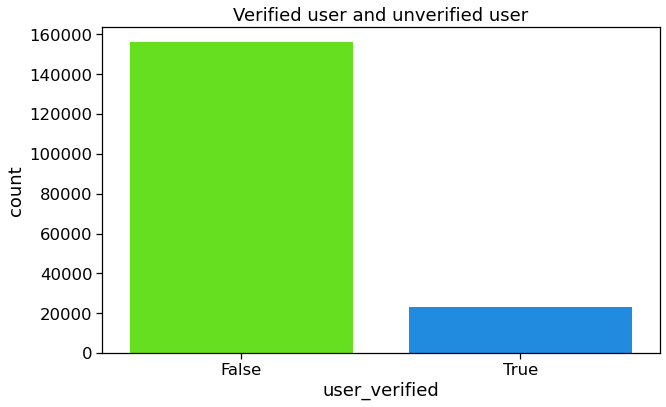

In [32]:
# no. of user is verified or not

plt.figure(figsize=(10,6))
sns.set_context(context='notebook',font_scale=1.5)
sns.countplot(df['user_verified'],palette='gist_rainbow')
plt.title('Verified user and unverified user')

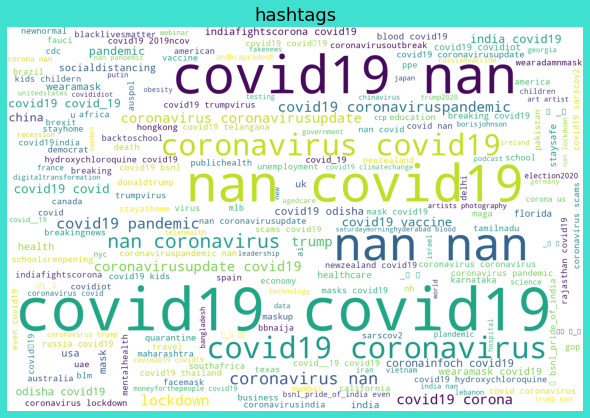

In [33]:
# let us plot hastag

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df['hashtags']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1800, height = 1200, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = '#40e0d0') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('hashtags')  
plt.show() 

# <a href="#Sentiment Analysis using nltk VADER">Sentiment Analysis using nltk VADER</a>

![](https://i.imgur.com/z67zou3.jpg)

* Sentiment analysis (also known as opinion mining or emotion AI) refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. Sentiment analysis is widely applied to voice of the customer materials such as reviews and survey responses, online and social media, and healthcare materials for applications that range from marketing to customer service to clinical medicine.

Ref-wikipedia.org

**VADER**
* A SentimentAnalyzer is a tool to implement and facilitate Sentiment Analysis tasks using NLTK features and classifiers,
especially for teaching and demonstrative purposes.

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


sid = SentimentIntensityAnalyzer()

In [35]:
# creating the new column for pol score

df['Sentiment_scores'] = df['text'].apply(lambda tweet: sid.polarity_scores(tweet))

In [36]:
# creating new column for the compound sentiment Analysis Score

df['compound'] = df['Sentiment_scores'].apply(lambda x:x['compound'])

In [37]:
# using lambda function to mark 'neg' and 'pos'  compound score

df['compound_result'] = df['compound'].apply(lambda score: 'pos' if score >=0 else 'neg')

C:\Users\sanket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



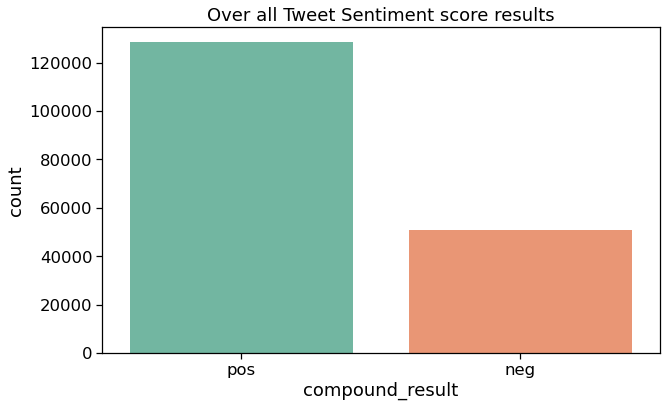

In [38]:
plt.figure(figsize=(10,6))
sns.set_context(context='notebook',font_scale=1.5)
sns.countplot(df['compound_result'],palette='Set2')
plt.title('Over all Tweet Sentiment score results');

* It seems tweets are more positive 

# <a href="#Let us see tweets sentiment score for each country">Let us see tweets sentiment score for each country</a>

In [39]:
# Top 12 country with their tweet sentiment score

US_compound_score    = df[df['user_location'].str.contains('United States',na=False)]['compound_result']
India_compound_score = df[df['user_location'].str.contains('India',na=False)]['compound_result']
China_compound_score = df[df['user_location'].str.contains('China',na=False)]['compound_result']
United_Kingdom_score = df[df['user_location'].str.contains('United Kingdom',na=False)]['compound_result']
Australia_score       = df[df['user_location'].str.contains('Australia',na=False)]['compound_result']
South_Africa_score     =  df[df['user_location'].str.contains('South Africa',na=False)]['compound_result']
Lagos_Nigeria_score     =  df[df['user_location'].str.contains('Lagos  Nigeria',na=False)]['compound_result']
Philippines_score     =  df[df['user_location'].str.contains('Philippines',na=False)]['compound_result']
Nairobi_Kenya_score     =  df[df['user_location'].str.contains('Nairobi  Kenya',na=False)]['compound_result']
Switzerland_score     =  df[df['user_location'].str.contains('Switzerland',na=False)]['compound_result']
Ireland_score     =  df[df['user_location'].str.contains('Ireland',na=False)]['compound_result']
Singapore_score     =  df[df['user_location'].str.contains('Singapore',na=False)]['compound_result']


In [40]:
sa = pd.DataFrame({'United_States':US_compound_score, 'India':India_compound_score, 'China':China_compound_score,'United_Kingdom':United_Kingdom_score,
                   'Australia':Australia_score, 'South_Africa':South_Africa_score,
                   'Philippines':Philippines_score,'Switzerland':Switzerland_score,'Ireland':Ireland_score,
                   'Singapore':Singapore_score})
                   
df_sa = pd.melt(sa)                 
                   
df_sa.columns = ['Country','positive_Negative_sentiment']

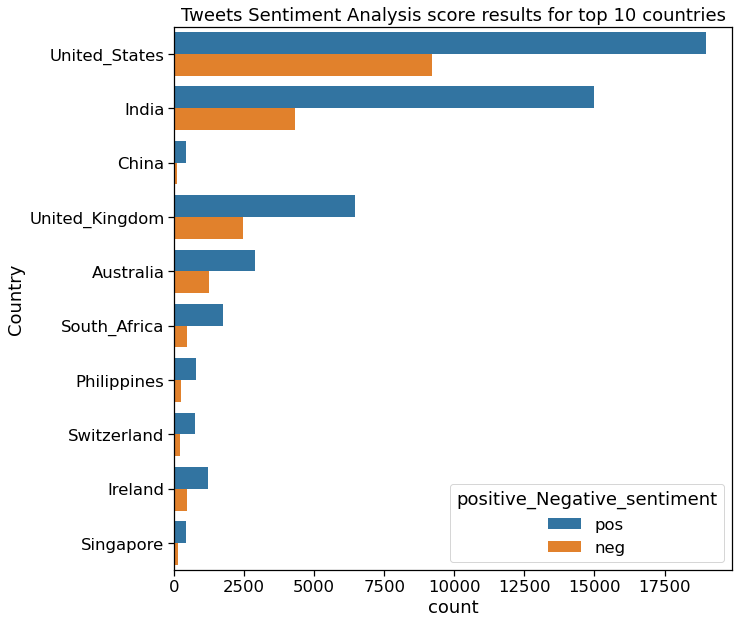

In [41]:
plt.figure(figsize=(10,10))
plt.title('Tweets Sentiment Analysis score results for top 10 countries')

sns.countplot(data=df_sa, y='Country', hue='positive_Negative_sentiment');

# NRCLex

* NRCLex will measure emotional affect from a body of text. Affect dictionary contains approximately 27,000 words, and is based on the National Research Council Canada (NRC) affect lexicon.

http://sentiment.nrc.ca/lexicons-for-research/


# we can analyse the tweets emotional affects

Emotional affects measured include the following :

* fear
* anger
* anticipation
* trust
* surprise
* positive
* negative
* sadness
* disgust
* joy

In [42]:
#pip install wheel

Note: you may need to restart the kernel to use updated packages.


In [43]:
#! pip install NRCLex

In [44]:
# Import required modules
from nrclex import NRCLex

In [45]:
# import of package
import nltk
from nrclex import NRCLex

from nltk.corpus import stopwords

In [46]:
df['text'] = df['text'].str.strip()

In [47]:
# function for convert the text and return tweets to emotions affects as dataframe

def emo_tweet(word):
    word = [word for word in word if word not in stopwords.words('english')]
    word = str([cell.encode('utf-8') for cell in word])# to convert the text into utf-8 unicode
    str_text = NRCLex(word) 
    str_text = str_text.raw_emotion_scores
    str_text = pd.DataFrame(str_text,index=[0])
    str_text = pd.melt(str_text)
    str_text.columns = ('Emotions','Count')
    str_text = str_text.sort_values('Count')
    return str_text

In [48]:
Ind_emo = df[df['user_location'].str.contains('India',na = False)]['text']
US_emo = df[df['user_location'].str.contains('United States',na=False)]['text']
china_emo = df[df['user_location'].str.contains('China',na=False)]['text']

In [49]:

India_emotion = emo_tweet(Ind_emo)
US_emotion = emo_tweet(US_emo)

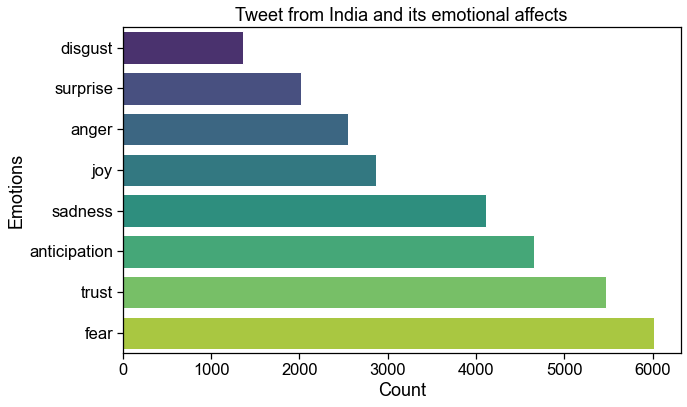

In [50]:
# tweets emotions affects

plt.figure(figsize=(10,6))
plt.title('Tweet from India and its emotional affects')
sns.set_style('white')
sns.set_context(context='notebook',font_scale=1.2)
sns.barplot(y='Emotions',x='Count',data=India_emotion[0:8],palette='viridis');

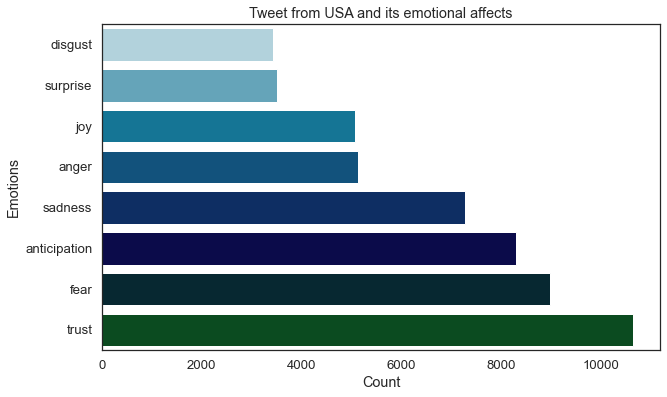

In [51]:
# tweets from USA and its emotional affects

plt.figure(figsize=(10,6))
plt.title('Tweet from USA and its emotional affects')
sns.set_style('dark')
sns.set_context(context='notebook',font_scale=1.2)
sns.barplot(y='Emotions',x='Count',data = US_emotion[0:8],palette='ocean_r');

In [52]:
Overall_tweet_emo = emo_tweet(df['text'])

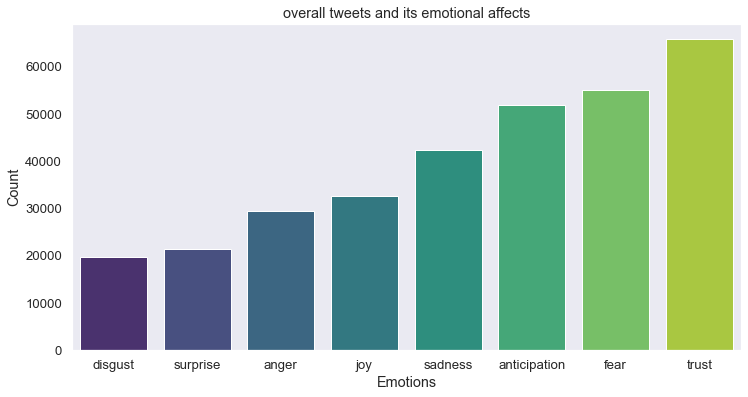

In [53]:
plt.figure(figsize=(12,6))
plt.title('overall tweets and its emotional affects')
sns.set_style('dark')
sns.set_context(context='notebook',font_scale=1.5)
sns.barplot(x='Emotions',y='Count',data = Overall_tweet_emo[0:8],palette='viridis');

# Thank you For Reading ...!